# Лаба 1, Бачурин Николай Владимирович М8О-311Б-23

Импорты


In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

output_path = "./out.csv"
train_path = "./train.csv"
test_path = "./test.csv"


train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

инфа всякая


In [248]:

print("Информация о тренировочных данных:")
print(train_df.info())
print("\nПервые 5 строк:")
display(train_df.head())

Информация о тренировочных данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             10487 non-null  object 
 1   Age                         10487 non-null  float64
 2   AnnualIncome                10487 non-null  float64
 3   CreditScore                 9986 non-null   float64
 4   LoanAmount                  9986 non-null   float64
 5   LoanDuration                10487 non-null  float64
 6   MaritalStatus               10487 non-null  object 
 7   NumberOfDependents          10487 non-null  float64
 8   HomeOwnershipStatus         10487 non-null  object 
 9   MonthlyDebtPayments         9986 non-null   float64
 10  CreditCardUtilizationRate   10487 non-null  float64
 11  NumberOfOpenCreditLines     10487 non-null  float64
 12  NumberOfCreditInquiries     10487 non-null  float64
 

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,4.0,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,2.0,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,3.0,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,3.0,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,5.0,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,31.347091


In [249]:
missing_values = train_df.isnull().sum()
missing_percentage = (missing_values / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
}).sort_values('Процент пропусков', ascending=False)

print("Топ-15 признаков с наибольшим количеством пропусков:")
display(missing_df.head(15))

Топ-15 признаков с наибольшим количеством пропусков:


,Количество пропусков,Процент пропусков
TotalAssets,1031,9.358265
CreditScore,1031,9.358265
LoanAmount,1031,9.358265
BaseInterestRate,1031,9.358265
NetWorth,1031,9.358265
MonthlyDebtPayments,1031,9.358265
CheckingAccountBalance,1031,9.358265
LoanPurpose,1031,9.358265
BankruptcyHistory,1031,9.358265
JobTenure,530,4.810747


чистим выбросы

In [250]:
print("Очистка целевой переменной...")
train_df = train_df.dropna(subset=['RiskScore'])
train_df = train_df[train_df['RiskScore'].between(0, 100)]
train_df['RiskScore'] = train_df['RiskScore'].clip(0.0, 100.0)

print(f"Размер после очистки: {train_df.shape}")
print(f"Диапазон RiskScore: [{train_df['RiskScore'].min():.2f}, {train_df['RiskScore'].max():.2f}]")


Очистка целевой переменной...
Размер после очистки: (10272, 35)
Диапазон RiskScore: [14.84, 97.60]


EDA

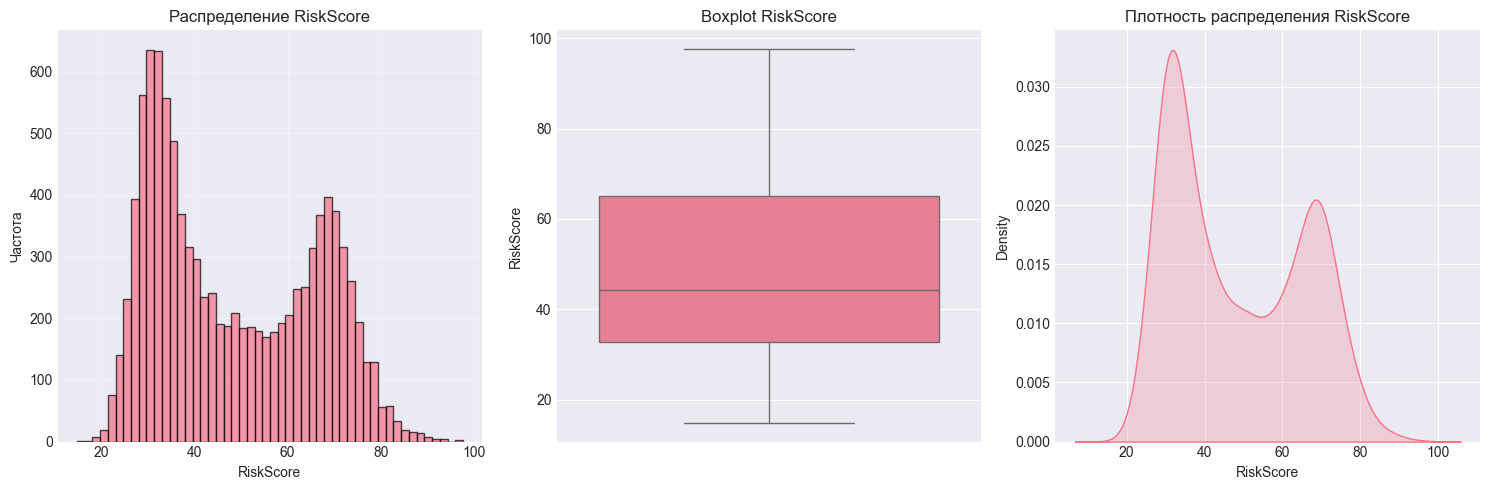

Статистика RiskScore:
count    10272.000000
mean        48.358094
std         17.241456
min         14.841417
25%         32.722756
50%         44.195792
75%         65.124190
max         97.597249
Name: RiskScore, dtype: float64


In [251]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(train_df['RiskScore'].dropna(), bins=50, edgecolor='black', alpha=0.7)
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
sns.boxplot(y=train_df['RiskScore'])
plt.title('Boxplot RiskScore')
plt.ylabel('RiskScore')
plt.subplot(1, 3, 3)
sns.kdeplot(train_df['RiskScore'].dropna(), fill=True)
plt.title('Плотность распределения RiskScore')
plt.xlabel('RiskScore')
plt.tight_layout()
plt.show()
print("Статистика RiskScore:")
print(train_df['RiskScore'].describe())

Количество числовых признаков: 29


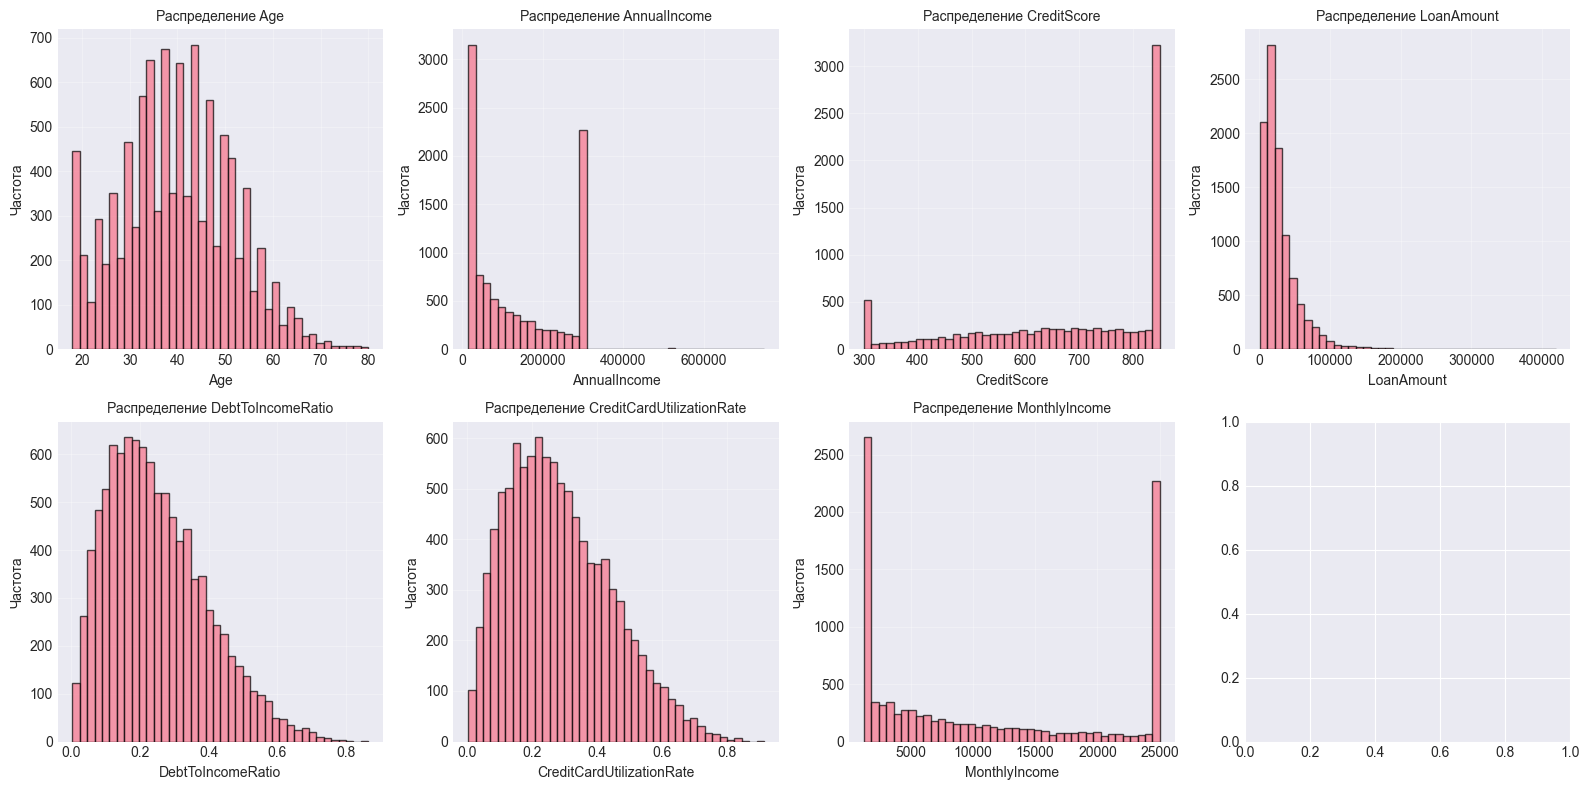

In [252]:
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Количество числовых признаков: {len(numerical_cols)}")
key_features = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount',
                'DebtToIncomeRatio', 'CreditCardUtilizationRate', 'MonthlyIncome']
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
for idx, col in enumerate(key_features):
    if col in train_df.columns:
        axes[idx].hist(train_df[col].dropna(), bins=40, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Распределение {col}', fontsize=10)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

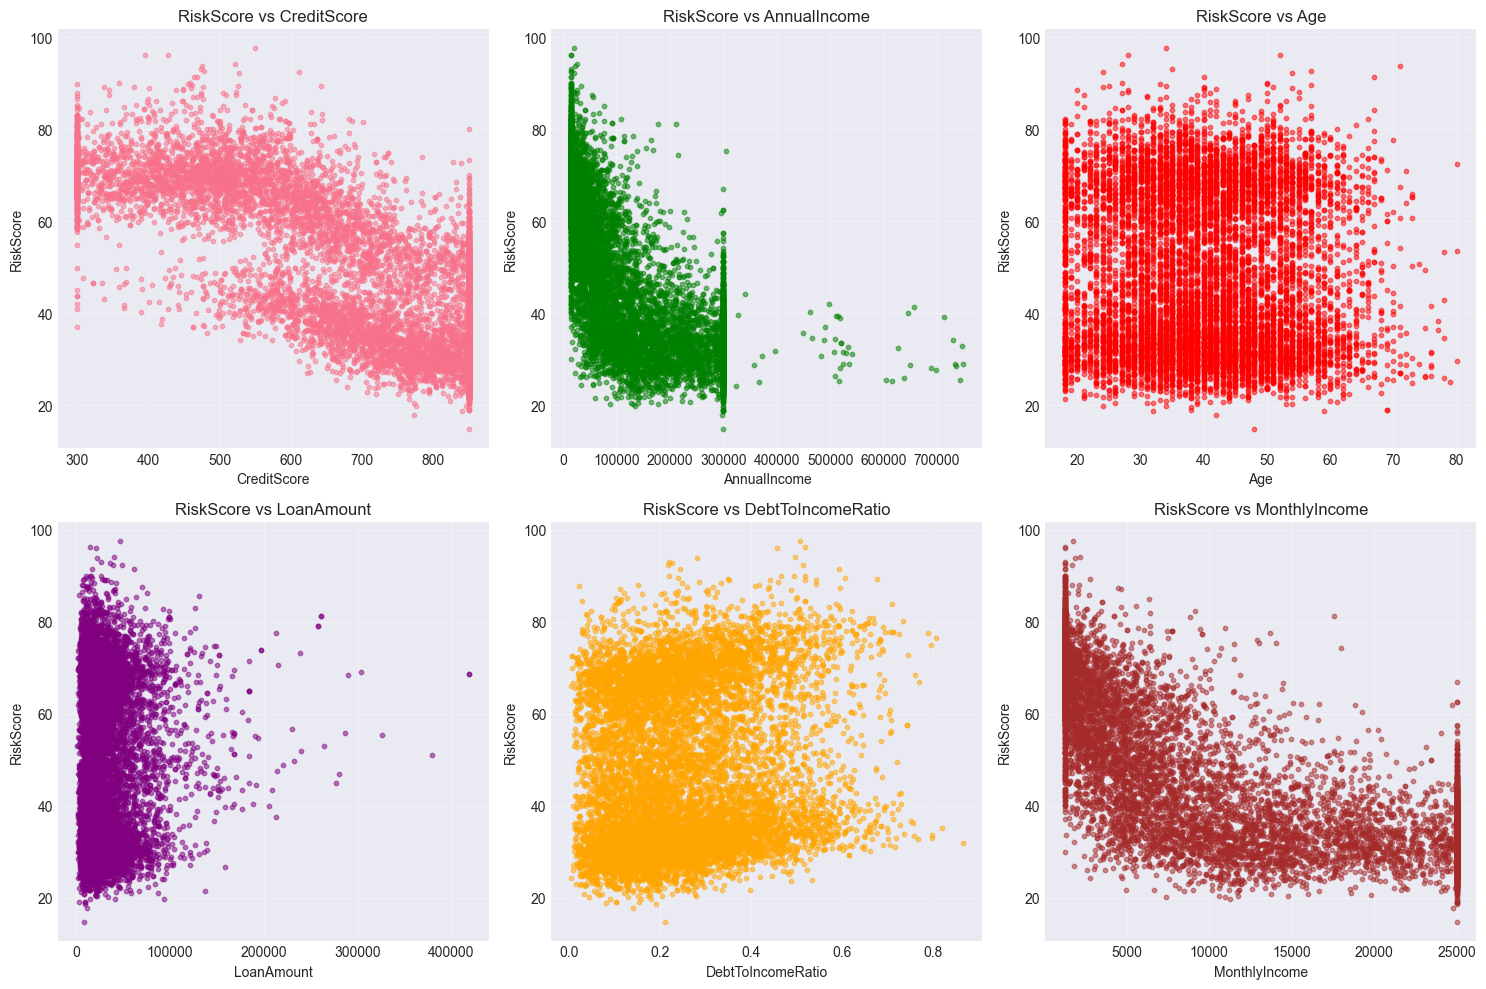

In [253]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# RiskScore vs CreditScore
if 'CreditScore' in train_df.columns:
    axes[0, 0].scatter(train_df['CreditScore'], train_df['RiskScore'], alpha=0.5, s=10)
    axes[0, 0].set_title('RiskScore vs CreditScore')
    axes[0, 0].set_xlabel('CreditScore')
    axes[0, 0].set_ylabel('RiskScore')
    axes[0, 0].grid(True, alpha=0.3)

# RiskScore vs AnnualIncome
if 'AnnualIncome' in train_df.columns:
    axes[0, 1].scatter(train_df['AnnualIncome'], train_df['RiskScore'], alpha=0.5, s=10, color='green')
    axes[0, 1].set_title('RiskScore vs AnnualIncome')
    axes[0, 1].set_xlabel('AnnualIncome')
    axes[0, 1].set_ylabel('RiskScore')
    axes[0, 1].grid(True, alpha=0.3)

# RiskScore vs Age
if 'Age' in train_df.columns:
    axes[0, 2].scatter(train_df['Age'], train_df['RiskScore'], alpha=0.5, s=10, color='red')
    axes[0, 2].set_title('RiskScore vs Age')
    axes[0, 2].set_xlabel('Age')
    axes[0, 2].set_ylabel('RiskScore')
    axes[0, 2].grid(True, alpha=0.3)

# RiskScore vs LoanAmount
if 'LoanAmount' in train_df.columns:
    axes[1, 0].scatter(train_df['LoanAmount'], train_df['RiskScore'], alpha=0.5, s=10, color='purple')
    axes[1, 0].set_title('RiskScore vs LoanAmount')
    axes[1, 0].set_xlabel('LoanAmount')
    axes[1, 0].set_ylabel('RiskScore')
    axes[1, 0].grid(True, alpha=0.3)

# RiskScore vs DebtToIncomeRatio
if 'DebtToIncomeRatio' in train_df.columns:
    axes[1, 1].scatter(train_df['DebtToIncomeRatio'], train_df['RiskScore'], alpha=0.5, s=10, color='orange')
    axes[1, 1].set_title('RiskScore vs DebtToIncomeRatio')
    axes[1, 1].set_xlabel('DebtToIncomeRatio')
    axes[1, 1].set_ylabel('RiskScore')
    axes[1, 1].grid(True, alpha=0.3)

# RiskScore vs MonthlyIncome
if 'MonthlyIncome' in train_df.columns:
    axes[1, 2].scatter(train_df['MonthlyIncome'], train_df['RiskScore'], alpha=0.5, s=10, color='brown')
    axes[1, 2].set_title('RiskScore vs MonthlyIncome')
    axes[1, 2].set_xlabel('MonthlyIncome')
    axes[1, 2].set_ylabel('RiskScore')
    axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Всего числовых признаков: 29


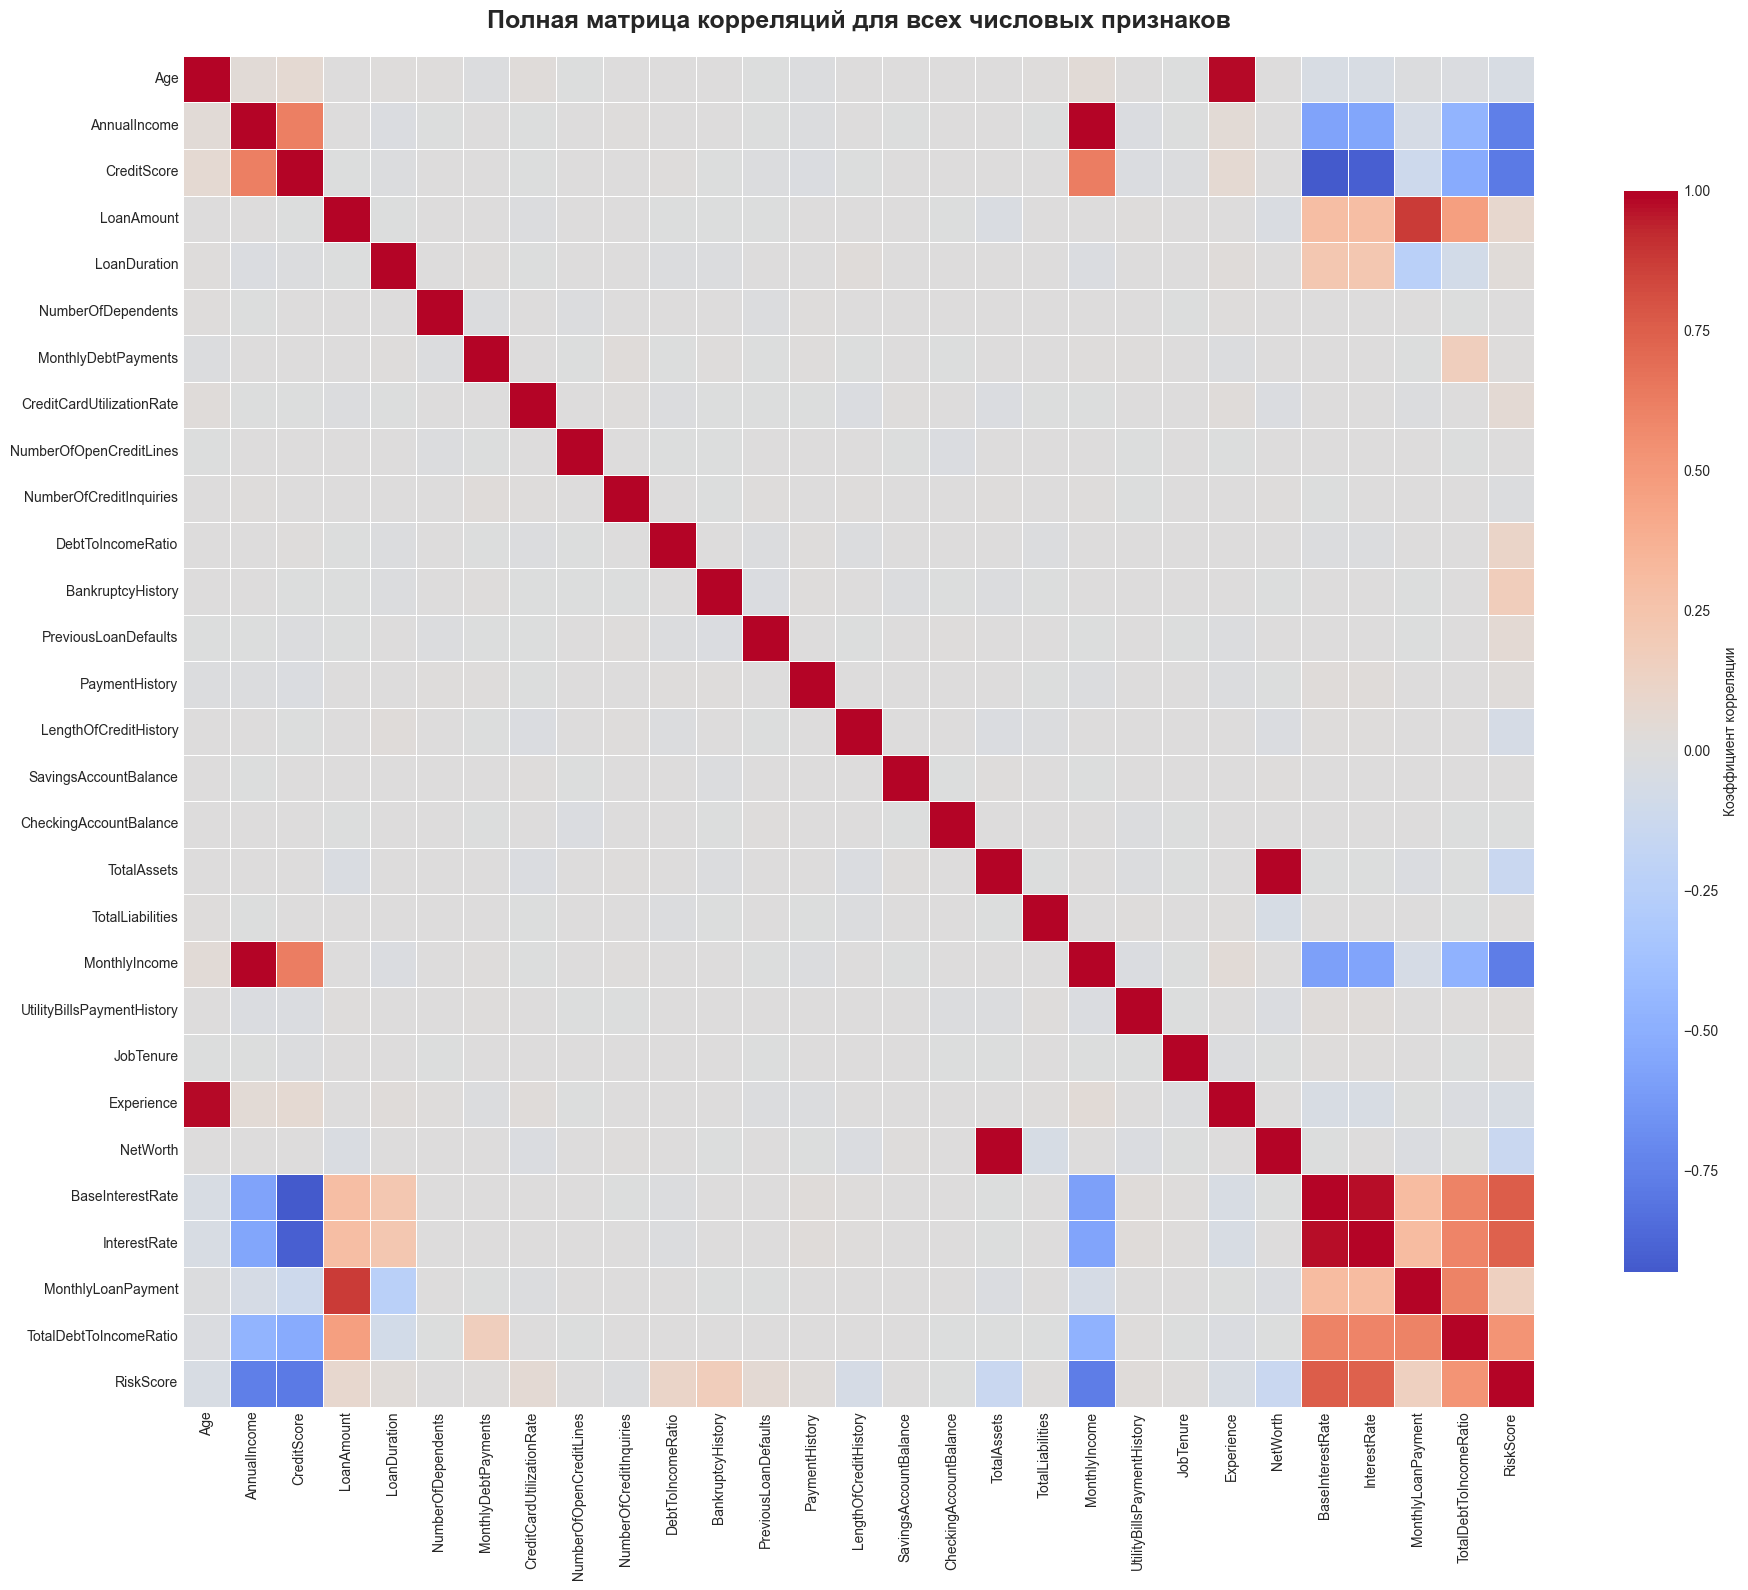

In [254]:
plt.figure(figsize=(20, 16))
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Всего числовых признаков: {len(numeric_cols)}")
full_correlation_matrix = train_df[numeric_cols].corr()
sns.heatmap(full_correlation_matrix,

            annot=False,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Коэффициент корреляции"})
plt.title('Полная матрица корреляций для всех числовых признаков', fontsize=18, pad=20, fontweight='bold')
plt.tight_layout()
plt.show()

Выводы по EDA:
RiskScore имеет выбросы в обе стороны, требуется корректировка в пределах [0, 100]

Признаки имеют очень слабую корреляцию с RiskScore, необходимы нелинейные преобразования

Сильной мультиколлинеарности не наблюдается, но некоторые признаки можно исключить для предотвращения переобучения

In [ ]:
Метрики

In [255]:
EPS = 1e-8
def compute_prediction_metrics(actual, predicted):

    def quadratic_error(actual, predicted):

        return np.mean((actual - predicted) ** 2)

    def absolute_error(actual, predicted):

        return np.mean(np.abs(actual - predicted))

    def percentage_error(actual, predicted):

        return np.mean(np.abs((actual - predicted) / (actual + EPS))) * 100

    def determination_coefficient(actual, predicted):

        error_sum = np.sum((actual - predicted) ** 2)
        total_variance = np.sum((actual - np.mean(actual)) ** 2)
        return 1 - error_sum / (total_variance + EPS)

    return {
        'mse': quadratic_error(actual, predicted),
        'mae': absolute_error(actual, predicted),
        'mape': percentage_error(actual, predicted),
        'r2': determination_coefficient(actual, predicted)
    }

Моя линейная регрессия

In [256]:
class RegressionModel:


    def __init__(self, optimization='matrix_solution', penalty=None,
                 penalty_weight=0.01, step_size=0.01, iterations=1000,
                 batch_count=32, norm_param=2):

        self.optimization_type = optimization
        self.penalty_method = penalty
        self.penalty_strength = penalty_weight
        self.gradient_step = step_size
        self.max_iterations = iterations
        self.minibatch_size = batch_count
        self.norm_parameter = norm_param
        self.model_coefficients: np.ndarray = np.array([])
        self.constant_term: float = 0.0

    def _matrix_inverse_solution(self, predictors, response, n_observations):

        predictors_with_const = np.column_stack([np.ones(n_observations), predictors])

        if self.penalty_method == 'l2_penalty':
            identity_mat = np.eye(predictors_with_const.shape[1])
            identity_mat[0, 0] = 0
            solution_vector = np.linalg.pinv(
                predictors_with_const.T @ predictors_with_const +
                self.penalty_strength * identity_mat
            ) @ predictors_with_const.T @ response
        else:
            solution_vector = np.linalg.pinv(
                predictors_with_const.T @ predictors_with_const
            ) @ predictors_with_const.T @ response

        self.constant_term = solution_vector[0]
        self.model_coefficients = solution_vector[1:]

    def _batch_gradient_optimization(self, predictors, response, n_observations):

        for _ in range(self.max_iterations):
            predictions = predictors @ self.model_coefficients + self.constant_term
            difference = predictions - response

            grad_weights = (2 / n_observations) * predictors.T @ difference
            grad_bias = (2 / n_observations) * np.sum(difference)

            if self.penalty_method == 'l1_penalty':
                grad_weights += self.penalty_strength * np.sign(self.model_coefficients)
            elif self.penalty_method == 'l2_penalty':
                grad_weights += 2 * self.penalty_strength * self.model_coefficients
            elif self.penalty_method == 'mixed_penalty':
                grad_weights += self.penalty_strength * (
                    0.5 * np.sign(self.model_coefficients) + self.model_coefficients
                )
            elif self.penalty_method == 'general_norm':
                grad_weights += self.penalty_strength * self.norm_parameter * \
                              np.sign(self.model_coefficients) * \
                              (np.abs(self.model_coefficients) ** (self.norm_parameter - 1))

            self.model_coefficients -= self.gradient_step * grad_weights
            self.constant_term -= self.gradient_step * grad_bias

    def _stochastic_gradient_optimization(self, predictors, response, n_observations):

        for epoch in range(self.max_iterations):
            sample_indices = np.random.permutation(n_observations)
            shuffled_predictors = predictors[sample_indices]
            shuffled_response = response[sample_indices]

            for batch_start in range(0, n_observations, self.minibatch_size):
                batch_end = min(batch_start + self.minibatch_size, n_observations)
                batch_predictors = shuffled_predictors[batch_start:batch_end]
                batch_response = shuffled_response[batch_start:batch_end]
                batch_length = len(batch_predictors)

                batch_predictions = batch_predictors @ self.model_coefficients + self.constant_term
                batch_difference = batch_predictions - batch_response

                grad_weights = (2 / batch_length) * batch_predictors.T @ batch_difference
                grad_bias = (2 / batch_length) * np.sum(batch_difference)

                if self.penalty_method == 'l1_penalty':
                    grad_weights += self.penalty_strength * np.sign(self.model_coefficients)
                elif self.penalty_method == 'l2_penalty':
                    grad_weights += 2 * self.penalty_strength * self.model_coefficients
                elif self.penalty_method == 'mixed_penalty':
                    grad_weights += self.penalty_strength * (
                        0.5 * np.sign(self.model_coefficients) + self.model_coefficients
                    )
                elif self.penalty_method == 'general_norm':
                    grad_weights += self.penalty_strength * self.norm_parameter * \
                                  np.sign(self.model_coefficients) * \
                                  (np.abs(self.model_coefficients) ** (self.norm_parameter - 1))

                self.model_coefficients -= self.gradient_step * grad_weights
                self.constant_term -= self.gradient_step * grad_bias

    def fit(self, X_data, y_data):

        X_array = np.array(X_data)
        y_array = np.array(y_data)
        n_samples, n_features = X_array.shape

        self.model_coefficients = np.zeros(n_features)
        self.constant_term = 0.0

        if self.optimization_type == 'matrix_solution':
            self._matrix_inverse_solution(X_array, y_array, n_samples)
        elif self.optimization_type == 'batch_gradient':
            self._batch_gradient_optimization(X_array, y_array, n_samples)
        elif self.optimization_type == 'stochastic_gradient':
            self._stochastic_gradient_optimization(X_array, y_array, n_samples)
        else:
            raise ValueError(f"Неизвестный алгоритм: {self.optimization_type}")

    def predict(self, X_data):

        return np.dot(np.array(X_data), self.model_coefficients) + self.constant_term

Дата пайп

In [257]:
class DataProcessingPipeline:


    def __init__(self, algorithm='sklearn', learning_step=0.01,
                 training_epochs=1000, sample_batch=128,
                 normalization='standard', regularization=None,
                 reg_param=0.01, norm_power=2):

        self.algorithm_type = algorithm
        self.learning_rate = learning_step
        self.epoch_count = training_epochs
        self.batch_size = sample_batch
        self.scaling_method = normalization
        self.regularization = regularization
        self.reg_strength = reg_param
        self.norm_degree = norm_power
        self._setup_components()

    def _setup_components(self):

        self.num_filler = None
        self.cat_filler = None
        self.scaler_params = None
        self.poly_generator = None
        self.category_encoder = None
        self.feature_filter = None
        self.prediction_model = None

    def _transform_logarithmic(self, data_values):

        return np.sign(data_values) * np.log1p(np.abs(data_values))

    def _normalize_data(self, data_frame, numeric_cols, training_phase=True):

        if self.scaling_method == 'standard':
            if training_phase:
                self.data_mean = data_frame[numeric_cols].mean()
                self.data_std = data_frame[numeric_cols].std().replace(0, 1)

            normalized = (data_frame[numeric_cols] - self.data_mean) / self.data_std

        elif self.scaling_method == 'range':
            if training_phase:
                self.data_min = data_frame[numeric_cols].min()
                self.data_max = data_frame[numeric_cols].max()

            divisor = self.data_max - self.data_min + EPS
            normalized = (data_frame[numeric_cols] - self.data_min) / divisor

        result = data_frame.copy()
        result[numeric_cols] = normalized
        return result

    def _process_numeric_features(self, data_frame, numeric_cols, training_phase=True):

        processed = data_frame.copy()

        if training_phase:
            self.num_filler = processed[numeric_cols].median()

        processed[numeric_cols] = processed[numeric_cols].fillna(self.num_filler)
        processed[numeric_cols] = self._transform_logarithmic(processed[numeric_cols])
        processed = self._normalize_data(processed, numeric_cols, training_phase)

        return processed

    def _process_categorical_features(self, data_frame, categorical_cols, training_phase=True):

        processed = data_frame.copy()

        if training_phase:
            self.cat_filler = processed[categorical_cols].mode().iloc[0]
            self.category_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
            self.category_encoder.fit(processed[categorical_cols])

        processed[categorical_cols] = processed[categorical_cols].fillna(self.cat_filler)

        encoded_matrix = self.category_encoder.transform(processed[categorical_cols])
        encoded_names = self.category_encoder.get_feature_names_out(categorical_cols)
        encoded_frame = pd.DataFrame(
            encoded_matrix,
            columns=encoded_names,
            index=processed.index
        )

        return encoded_frame

    def _generate_polynomial_terms(self, data_frame, numeric_cols, training_phase=True):

        if training_phase:
            self.poly_generator = PolynomialFeatures(degree=2, include_bias=False)
            self.poly_generator.fit(data_frame[numeric_cols])

        polynomial_features = self.poly_generator.transform(data_frame[numeric_cols])
        poly_column_names = self.poly_generator.get_feature_names_out(numeric_cols)
        poly_frame = pd.DataFrame(
            polynomial_features,
            columns=poly_column_names,
            index=data_frame.index
        )

        if training_phase:
            self.poly_means = poly_frame.mean()
            self.poly_stds = poly_frame.std().replace(0, 1)

        poly_frame = (poly_frame - self.poly_means) / self.poly_stds
        return poly_frame

    def _select_relevant_features(self, features_matrix, target_vector, training_phase=True):

        if training_phase:
            if not isinstance(features_matrix, pd.DataFrame):
                features_matrix = pd.DataFrame(features_matrix)

            target_series = pd.Series(target_vector) if not isinstance(target_vector, pd.Series) else target_vector

            correlation_values = features_matrix.apply(lambda col: col.corr(target_series))
            abs_correlations = correlation_values.abs()
            sorted_correlations = abs_correlations.sort_values(ascending=False)

            feature_count = len(features_matrix.columns)
            selected_count = max(1, int(0.3 * feature_count))
            self.selected_features = sorted_correlations.head(selected_count).index.tolist()
            self.correlation_info = sorted_correlations

        return features_matrix[self.selected_features].values

    def fit(self, X_data, y_data, numeric_columns, categorical_columns):

        X_processed = X_data.copy()


        numeric_processed = self._process_numeric_features(X_processed, numeric_columns, True)
        polynomial_features = self._generate_polynomial_terms(numeric_processed, numeric_columns, True)
        categorical_features = self._process_categorical_features(X_processed, categorical_columns, True)


        combined_features = pd.concat([polynomial_features, categorical_features], axis=1)
        selected_features = self._select_relevant_features(combined_features, y_data, True)


        if self.algorithm_type == 'sklearn':
            self.prediction_model = LinearRegression()
            self.prediction_model.fit(selected_features, y_data)
        else:
            self.prediction_model = RegressionModel(
                optimization=self.algorithm_type,
                step_size=self.learning_rate,
                iterations=self.epoch_count,
                batch_count=self.batch_size,
                penalty=self.regularization,
                penalty_weight=self.reg_strength,
                norm_param=self.norm_degree
            )
            self.prediction_model.fit(selected_features, y_data)

        return self

    def transform(self, X_data, numeric_columns, categorical_columns):
        X_processed = X_data.copy()

        numeric_processed = self._process_numeric_features(X_processed, numeric_columns, False)
        polynomial_features = self._generate_polynomial_terms(numeric_processed, numeric_columns, False)
        categorical_features = self._process_categorical_features(X_processed, categorical_columns, False)

        combined_features = pd.concat([polynomial_features, categorical_features], axis=1)
        selected_features = self._select_relevant_features(combined_features, None, False)

        return selected_features

    def predict(self, X_data, numeric_columns, categorical_columns):

        prepared_features = self.transform(X_data, numeric_columns, categorical_columns)
        return self.prediction_model.predict(prepared_features)

Кросс-валидация

In [258]:
class CrossValidationSplitter:


    class KFoldSplitter:


        def __init__(self, n_splits=5, randomize=True, seed=42):
            self.n_folds = n_splits
            self.randomize_data = randomize
            self.random_seed = seed

        def split(self, data):

            n_samples = len(data)
            indices = np.arange(n_samples)

            if self.randomize_data:
                rng = np.random.RandomState(self.random_seed)
                rng.shuffle(indices)

            fold_sizes = np.full(self.n_folds, n_samples // self.n_folds, dtype=int)
            remainder = n_samples % self.n_folds
            if remainder > 0:
                fold_sizes[:remainder] += 1

            current_position = 0
            for fold_size in fold_sizes:
                start_idx, end_idx = current_position, current_position + fold_size
                validation_indices = indices[start_idx:end_idx]
                training_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
                yield training_indices, validation_indices
                current_position = end_idx

    class LeaveOneOutSplitter:


        def __init__(self, randomize=True, seed=42):
            self.randomize_data = randomize
            self.random_seed = seed

        def split(self, data):

            n_samples = len(data)
            indices = np.arange(n_samples)

            if self.randomize_data:
                rng = np.random.RandomState(self.random_seed)
                rng.shuffle(indices)

            for i in range(n_samples):
                validation_indices = [indices[i]]
                training_indices = np.delete(indices, i)
                yield training_indices, validation_indices


Преобразования признаков

In [259]:
def enhance_features(dataframe):


    processed_df = dataframe.copy()

    # Удаление временной метки заявки (малоинформативный признак)
    processed_df.drop(columns=['ApplicationDate'], inplace=True, errors='ignore')

    # Композитный показатель дохода (инвертированный логарифм среднего дохода)
    monthly_equivalent = processed_df['AnnualIncome'] / 12
    income_avg = (processed_df['MonthlyIncome'] + monthly_equivalent) / 2
    processed_df['IncomeComposite'] = 1.0 / (np.log1p(np.abs(income_avg)) + 1.0)

    # Логарифмические преобразования для стабилизации дисперсии
    processed_df['LogAnnualIncome'] = -np.log1p(np.abs(processed_df['AnnualIncome']))
    processed_df['LogLoanAmount'] = -np.log1p(np.abs(processed_df['LoanAmount']))
    processed_df['LogBaseInterest'] = np.log1p(np.abs(processed_df['BaseInterestRate']))

    # Процентные ставки и кредитные условия
    processed_df['InterestRateMean'] = (processed_df['BaseInterestRate'] + processed_df['InterestRate']) / 2.0
    processed_df['InterestRateSpread'] = processed_df['InterestRate'] - processed_df['BaseInterestRate']

    # Демографические и карьерные показатели
    processed_df['ExperienceAgeDifference'] = processed_df['Age'] - processed_df['Experience']
    processed_df['RelativeExperience'] = processed_df['Experience'] / (processed_df['Age'] + 1.0)

    # Финансовые коэффициенты и отношения
    processed_df['WealthToIncome'] = processed_df['NetWorth'] / (np.abs(processed_df['AnnualIncome']) + 1.0)
    processed_df['LoanToAnnualIncome'] = processed_df['LoanAmount'] / (np.abs(processed_df['AnnualIncome']) + 1.0)
    processed_df['CreditHistoryProportion'] = processed_df['LengthOfCreditHistory'] / (processed_df['Age'] + 1.0)

    # Показатели долговой нагрузки
    total_monthly_obligations = processed_df['MonthlyLoanPayment'] + processed_df['MonthlyDebtPayments']
    processed_df['DebtServiceRatio'] = total_monthly_obligations / (processed_df['MonthlyIncome'] + 1.0)
    processed_df['MonthlyDiscretionary'] = processed_df['MonthlyIncome'] - total_monthly_obligations

    # Соотношения активов и обязательств
    processed_df['AssetToLiability'] = processed_df['TotalAssets'] / (processed_df['TotalLiabilities'] + 1.0)
    processed_df['LiabilitySurplus'] = processed_df['TotalLiabilities'] - processed_df['TotalAssets']
    processed_df['NetWorthToLiabilities'] = processed_df['NetWorth'] / (processed_df['TotalLiabilities'] + 1.0)

    # Показатели зависимости и семейного положения
    processed_df['IncomePerHouseholdMember'] = processed_df['AnnualIncome'] / (processed_df['NumberOfDependents'] + 1.0)

    #  Интерактивные признаки (взаимодействия)
    processed_df['IncomeDebtInteraction'] = processed_df['AnnualIncome'] * processed_df['TotalDebtToIncomeRatio']
    processed_df['AgeCreditHistoryProduct'] = processed_df['Age'] * processed_df['LengthOfCreditHistory']

    #  Трансформации существующих признаков
    processed_df['NetWorthCubic'] = np.power(np.log1p(np.abs(processed_df['NetWorth'])), 3)

    # Бинаризация и категоризация
    processed_df['HighCreditScoreFlag'] = (processed_df['CreditScore'] >= 700).astype(int)
    processed_df['LowCreditScoreFlag'] = (processed_df['CreditScore'] <= 600).astype(int)
    processed_df['HasDependentsFlag'] = (processed_df['NumberOfDependents'] > 0).astype(int)

    # Категоризация кредитного скора
    score_thresholds = [300, 500, 600, 650, 700, 750, 800, 850, 900]
    category_labels = ['VeryPoor', 'Poor', 'Fair', 'Good', 'VeryGood', 'Excellent', 'Outstanding', 'TopTier']

    processed_df['CreditScoreCategory'] = pd.cut(
        processed_df['CreditScore'],
        bins=score_thresholds,
        labels=category_labels,
        include_lowest=True
    ).astype('category')

    # Нормализованные версии ключевых признаков
    for col in ['AnnualIncome', 'LoanAmount', 'NetWorth', 'MonthlyIncome']:
        if col in processed_df.columns:
            col_mean = processed_df[col].mean()
            col_std = processed_df[col].std() + 1e-8
            processed_df[f'Standardized_{col}'] = (processed_df[col] - col_mean) / col_std

    #  Производные финансовые индикаторы
    processed_df['FinancialStressIndex'] = (
        processed_df['DebtToIncomeRatio'] +
        processed_df['TotalDebtToIncomeRatio'] +
        processed_df['CreditCardUtilizationRate']
    ) / 3.0

    processed_df['CreditActivityLevel'] = (
        processed_df['NumberOfOpenCreditLines'] +
        processed_df['NumberOfCreditInquiries']
    )

    # Обработка экстремальных значений (winsorization)
    for col in ['AnnualIncome', 'LoanAmount', 'NetWorth']:
        if col in processed_df.columns:
            lower_limit = processed_df[col].quantile(0.01)
            upper_limit = processed_df[col].quantile(0.99)
            processed_df[col] = processed_df[col].clip(lower=lower_limit, upper=upper_limit)

    # Создание полиномиальных признаков для ключевых переменных
    key_features = ['AnnualIncome', 'LoanAmount', 'CreditScore', 'Age']
    for feature in key_features:
        if feature in processed_df.columns:
            processed_df[f'{feature}_Squared'] = processed_df[feature] ** 2
            processed_df[f'{feature}_Cubic'] = processed_df[feature] ** 3

    #  Агрегированные статистики по группам
    # создаем фиктивные агрегаты

    print(f"Исходное количество признаков: {len(dataframe.columns)}")
    print(f"Конечное количество признаков: {len(processed_df.columns)}")
    print(f"Создано новых признаков: {len(processed_df.columns) - len(dataframe.columns) + 1}")

    return processed_df

Итог

In [260]:
RESULT_FILE = "./out.csv"
train_df = train_df.dropna(subset=['RiskScore'])
train_df = train_df[train_df['RiskScore'].abs() <= 200].reset_index(drop=True)
train_df['RiskScore'] = train_df['RiskScore'].clip(0.0, 100.0)

train_df = enhance_features(train_df)
test_df = enhance_features(test_df)

X_features = train_df.drop(columns=['RiskScore'])
y_target = train_df['RiskScore']
X_evaluation = test_df.drop(columns=['ID'])

numeric_features = X_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = list(set(X_features.columns) - set(numeric_features))

method_configurations = [
    ['sklearn', None, None, 0],
    ['matrix_solution', None, None, 0],
    ['matrix_solution', 'l2_penalty', 100, 0],
    ['batch_gradient', None, None, 0],
    ['batch_gradient', 'l1_penalty', 0.1, 0],
    ['batch_gradient', 'l2_penalty', 0.001, 0],
    ['batch_gradient', 'general_norm', 0.1, 3],
    ['stochastic_gradient', None, None, 0],
]

print('Оценка методов с использованием кросс-валидации K-Fold')


validation_scores = {}
splitter = CrossValidationSplitter.KFoldSplitter()

for method_name, regularization, reg_param, norm_param in method_configurations:
    error_scores = []

    for train_indices, val_indices in splitter.split(X_features):
        X_train_split = X_features.iloc[train_indices].copy()
        X_val_split = X_features.iloc[val_indices].copy()
        y_train_split = y_target.iloc[train_indices]
        y_val_split = y_target.iloc[val_indices]

        pipeline = DataProcessingPipeline(
            algorithm=method_name,
            regularization=regularization,
            reg_param=reg_param,
            norm_power=norm_param
        )

        pipeline.fit(
            X_train_split,
            y_train_split,
            numeric_features,
            categorical_features
        )

        predictions = pipeline.predict(
            X_val_split,
            numeric_features,
            categorical_features
        )

        metrics = compute_prediction_metrics(y_val_split, predictions)
        error_scores.append(metrics['mse'])

    avg_error = np.mean(error_scores)
    validation_scores[method_name] = avg_error

    reg_display = regularization if regularization else 'без регуляризации'
    param_display = reg_param if reg_param else ''
    print(f'  {method_name} ({reg_display}, {param_display}): MSE = {avg_error:.3f}')


print('Сравнение методов нормализации')


X_train_main, X_val_main, y_train_main, y_val_main = train_test_split(
    X_features, y_target, test_size=0.2, random_state=42
)

for norm_method in ['standard', 'range']:
    processing_pipeline = DataProcessingPipeline(
        algorithm='matrix_solution',
        normalization=norm_method
    )

    processing_pipeline.fit(
        X_train_main,
        y_train_main,
        numeric_features,
        categorical_features
    )

    val_predictions = processing_pipeline.predict(
        X_val_main,
        numeric_features,
        categorical_features
    )

    method_name = 'z-score' if norm_method == 'standard' else 'min-max'
    mse_value = compute_prediction_metrics(y_val_main, val_predictions)['mse']
    print(f'  MSE при {method_name} нормализации: {mse_value:.3f}')

print('\n' + '=' * 60)
print('Проверка корректности метрик')
print('=' * 60)

final_pipeline = DataProcessingPipeline(
    algorithm='matrix_solution',
    normalization='standard'
)

final_pipeline.fit(
    X_train_main,
    y_train_main,
    numeric_features,
    categorical_features
)

final_predictions = final_pipeline.predict(
    X_val_main,
    numeric_features,
    categorical_features
)

final_pipeline.fit(
    X_features,
    y_target,
    numeric_features,
    categorical_features
)

test_predictions = final_pipeline.predict(
    X_evaluation,
    numeric_features,
    categorical_features
)

test_predictions = np.clip(test_predictions, 0.0, 100.0)

# Сохранение результатов
result_dataframe = pd.DataFrame({
    'ID': np.arange(len(test_df)),
    'RiskScore': test_predictions
})

result_dataframe.to_csv(RESULT_FILE, index=False)
print(f'\nРезультаты сохранены в файл: {RESULT_FILE}')

Оценка методов с использованием кросс-валидации K-Fold
  sklearn (без регуляризации, ): MSE = 25.159
  matrix_solution (без регуляризации, ): MSE = 25.160
  matrix_solution (l2_penalty, 100): MSE = 26.707
  batch_gradient (без регуляризации, ): MSE = 30.516
  batch_gradient (l1_penalty, 0.1): MSE = 30.992
  batch_gradient (l2_penalty, 0.001): MSE = 30.496
  batch_gradient (general_norm, 0.1): MSE = 30.963
  stochastic_gradient (без регуляризации, ): MSE = 27.042
Сравнение методов нормализации
  MSE при z-score нормализации: 25.768
  MSE при min-max нормализации: 39.629

Проверка корректности метрик

Результаты сохранены в файл: ./out.csv
